In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

For our EDA, Exploring the penguins dataset. Here are the steps we took to better understand the data provided.

# Loading the dataset

We first loaded the dataset to gauge its size and shape.

In [2]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.shape

(344, 7)

The dataset has 344 rows and 7 columns.

# Identifying data types

Observed the different types of values present in the dataset. This helped us determine the types of analyses that we can do with the data provided.

In [4]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

# Data cleaning

Performed data cleaning to make sure that we derive useful insights from the dataset. During this step, I decided to remove the null values and remove one row with an inconsistent value (a period) for the 'sex' variable.

In [5]:
# Number of NULL values per column
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
# We drop rows with NULLs
df.dropna(inplace=True)

# We remove the '.' sex
df = df[df['sex'] != '.']

# Converting the body mass into kg

To make the dataset easier for us to read, we also converted the values in the 'body_mass_g' column from grams to kilograms.

In [7]:
df['body_mass_kg'] = df['body_mass_g'] / 1000

# Looking at the Descriptives

Once the dataset was cleaned, I looked at the descriptive variables, such as the location and sex.

Our initial analysis showed that geography does not appear to impact the "sizes" of the Adelie penguins across the three islands. We concluded that geography is not an effective indicator in determining the size of the species.

Mewanwhile, I found a pattern in the size and sex of the penguins. I found that, in general, male penguins tend to be bigger and heavier than female penguins of the same species. Across all species, however, Gentoo penguins are the biggest and heaviest.

In [8]:
# Mean of the culmen length, depth, flipper length, body mass

grouped_sex_species = df[['island', 'sex', 'species', 'culmen_length_mm', 'culmen_depth_mm',
                      'flipper_length_mm', 'body_mass_kg']].groupby(['island', 'species', 'sex'])

grouped_sex_species.mean().round(2)

culmen_length_mm  culmen_depth_mm  \
island    species   sex                                         
Biscoe    Adelie    FEMALE             37.36            17.70   
                    MALE               40.59            19.04   
          Gentoo    FEMALE             45.56            14.24   
                    MALE               49.47            15.72   
Dream     Adelie    FEMALE             36.91            17.62   
                    MALE               40.07            18.84   
          Chinstrap FEMALE             46.57            17.59   
                    MALE               51.09            19.25   
Torgersen Adelie    FEMALE             37.55            17.55   
                    MALE               40.59            19.39   

                            flipper_length_mm  body_mass_kg  
island    species   sex                                      
Biscoe    Adelie    FEMALE             187.18          3.37  
                    MALE               190.41          4.05  
          Gentoo    FEMALE             212.71          4.68  
                    MALE               221.54          5.48  
Dream     Adelie    FEMALE             187.85          3.34  
                    MALE               191.93          4.05  
          Chinstrap FEMALE             191.74          3.53  
                    MALE               199.91          3.94  
Torgersen Adelie    FEMALE             188.29          3.40  
                    MALE               194.91          4.03

# Initial visuals

In [9]:
gpb1_count = (df[['species', 'sex', 'culmen_length_mm']]
        .groupby(['species', 'sex'])
        .count()
        )

gpb1_mean = (df[['species', 'sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_kg']]
        .groupby(['species', 'sex'])
        .mean()
        .round(2)
        )

gpb1_std = (df[['species', 'sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_kg']]
        .groupby(['species', 'sex'])
        .std()
        .round(2)
        .unstack()
        )

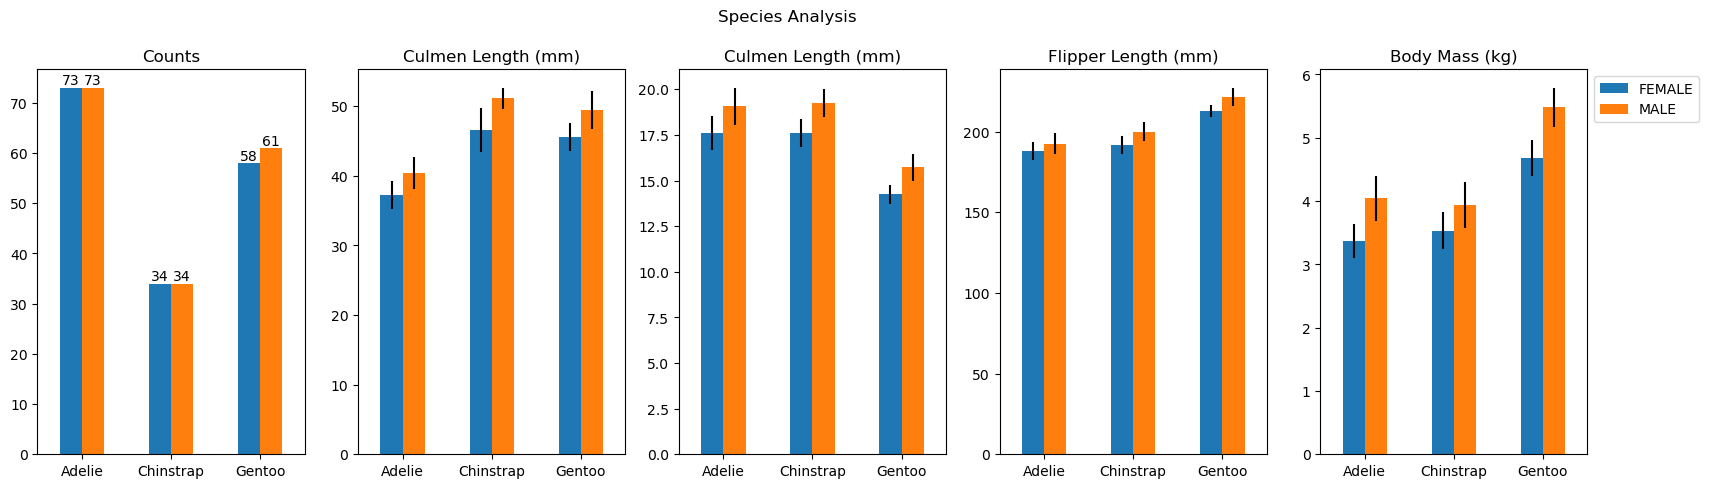

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

gpb1_count.unstack(level=1)['culmen_length_mm'].plot(kind='bar', rot=0, ax=axs[0], legend=False)
axs[0].bar_label(axs[0].containers[0])
axs[0].bar_label(axs[0].containers[1])
axs[0].set_title('Counts')
axs[0].set_xlabel(None)


g = gpb1_mean.unstack()['culmen_length_mm'].plot(kind='bar', yerr=gpb1_std['culmen_length_mm'], rot=0, ax=axs[1], legend=False)
axs[1].set_title('Culmen Length (mm)')
axs[1].set_xlabel(None)


gpb1_mean.unstack()['culmen_depth_mm'].plot(kind='bar', yerr=gpb1_std['culmen_depth_mm'], rot=0, ax=axs[2], legend=False)
axs[2].set_title('Culmen Length (mm)')
axs[2].set_xlabel(None)

gpb1_mean.unstack()['flipper_length_mm'].plot(kind='bar', yerr=gpb1_std['flipper_length_mm'], rot=0, ax=axs[3], legend=False)
axs[3].set_title('Flipper Length (mm)')
axs[3].set_xlabel(None)

gpb1_mean.unstack()['body_mass_kg'].plot(kind='bar', yerr=gpb1_std['body_mass_kg'], rot=0, ax=axs[4], legend=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
axs[4].set_title('Body Mass (kg)')
axs[4].set_xlabel(None)

plt.suptitle('Species Analysis', x=0.5, y=1.)
plt.show()

### Adelie penguins from different islands

In [11]:
gpb2 = (df.query('species == "Adelie"')[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_kg']]
        .groupby(['island'])
        .agg(['mean', 'std', 'count'])
        .round(2)
     )

gpb2

culmen_length_mm             culmen_depth_mm              \
                      mean   std count            mean   std count   
island                                                               
Biscoe               38.98  2.48    44           18.37  1.19    44   
Dream                38.52  2.48    55           18.24  1.14    55   
Torgersen            39.04  3.03    47           18.45  1.35    47   

          flipper_length_mm             body_mass_kg              
                       mean   std count         mean   std count  
island                                                            
Biscoe               188.80  6.73    44         3.71  0.49    44  
Dream                189.93  6.48    55         3.70  0.45    55  
Torgersen            191.53  6.22    47         3.71  0.45    47

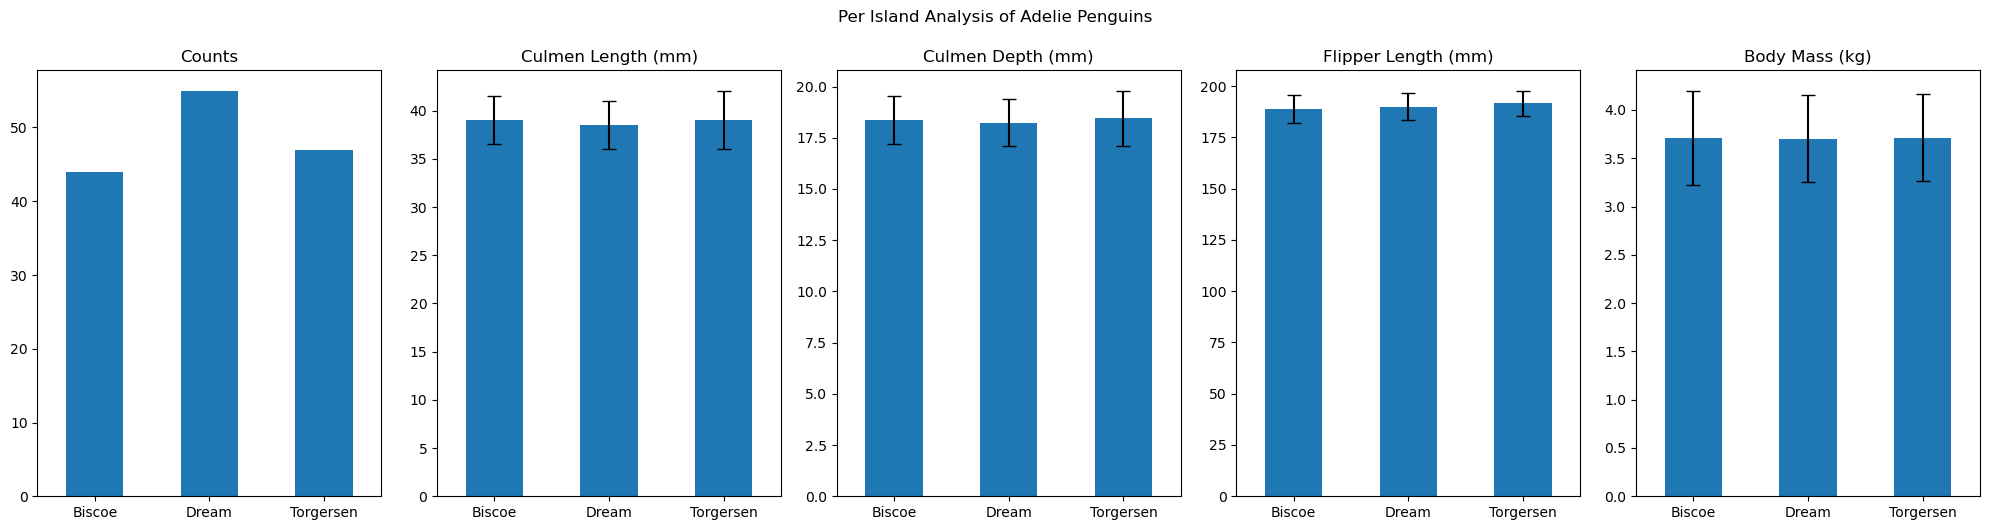

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

gpb2['culmen_length_mm']['count'].plot(kind='bar', rot=0, ax=axs[0])
#axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Counts')
axs[0].set_xlabel(None)

gpb2['culmen_length_mm']['mean'].plot(kind='bar', rot=0, ax=axs[1])
#axs[1].bar_label(axs[1].containers[0])
axs[1].errorbar(x=gpb2.index, y=gpb2['culmen_length_mm']['mean'], yerr=gpb2['culmen_length_mm']['std'], ecolor='black', capsize=5, fmt='none')  
axs[1].set_title('Culmen Length (mm)')
axs[1].set_xlabel(None)

gpb2['culmen_depth_mm']['mean'].plot(kind='bar', rot=0, ax=axs[2])
#axs[2].bar_label(axs[2].containers[0])
axs[2].errorbar(x=gpb2.index, y=gpb2['culmen_depth_mm']['mean'], yerr=gpb2['culmen_depth_mm']['std'], ecolor='black', capsize=5, fmt='none')  
axs[2].set_title('Culmen Depth (mm)')
axs[2].set_xlabel(None)

gpb2['flipper_length_mm']['mean'].plot(kind='bar', rot=0, ax=axs[3])
#axs[3].bar_label(axs[3].containers[0])
axs[3].errorbar(x=gpb2.index, y=gpb2['flipper_length_mm']['mean'], yerr=gpb2['flipper_length_mm']['std'], ecolor='black', capsize=5, fmt='none')  
axs[3].set_title('Flipper Length (mm)')
axs[3].set_xlabel(None)

gpb2['body_mass_kg']['mean'].plot(kind='bar', rot=0, ax=axs[4])
#axs[4].bar_label(axs[4].containers[0])
axs[4].errorbar(x=gpb2.index, y=gpb2['body_mass_kg']['mean'], yerr=gpb2['body_mass_kg']['std'], ecolor='black', capsize=5, fmt='none')  
axs[4].set_title('Body Mass (kg)')
axs[4].set_xlabel(None)

plt.tight_layout()
plt.suptitle('Per Island Analysis of Adelie Penguins', x=0.5, y=1.05)
plt.show()

No difference in the features of the Adelie penguins in different islands.

# Analyzing the Pairplot

Together with my classmate we made a pairplot to further summarize the dataset and compare the other variables to derive more insights from the data.

At this point, we wanted to answer the following questions:
1. What can we use this dataset for?
2. How can we use it to differentiate between species?

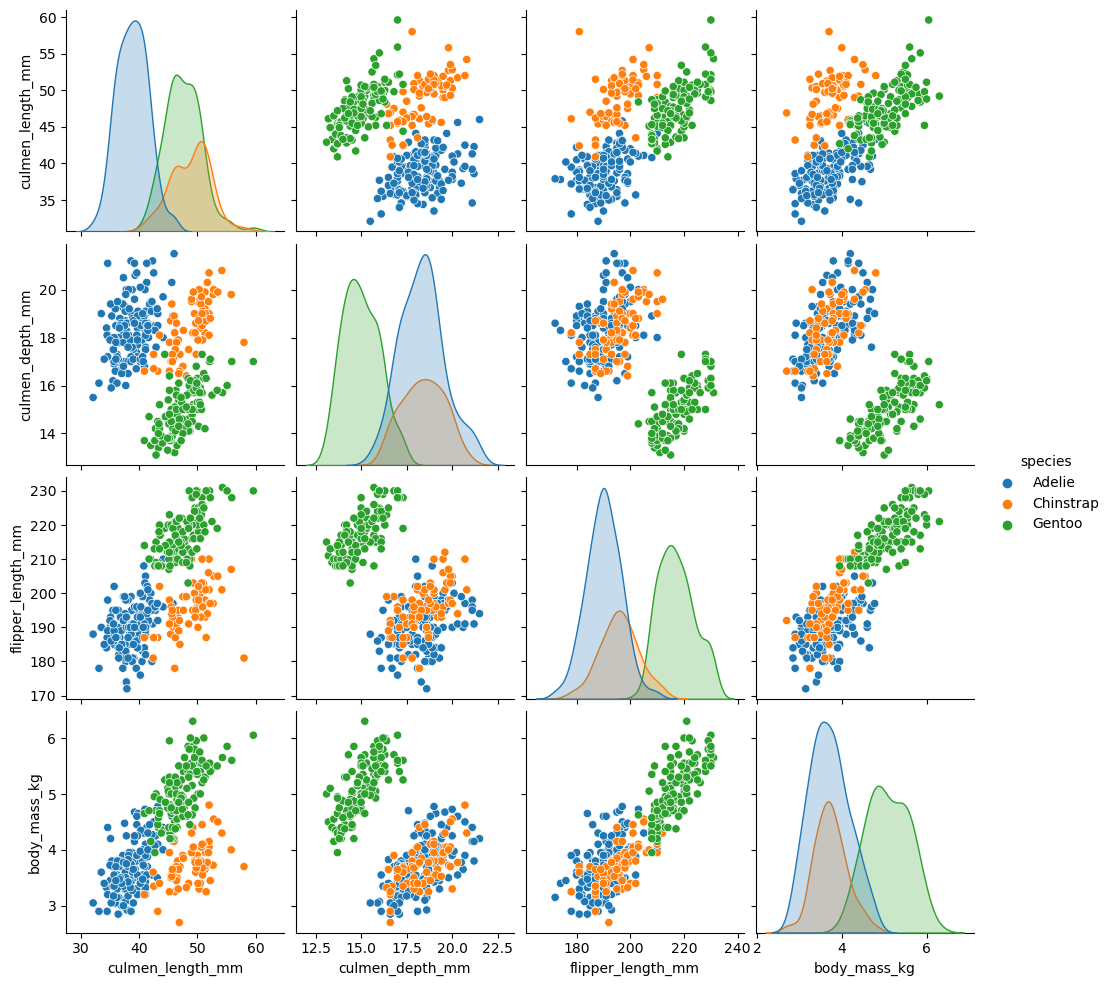

In [13]:
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(df[['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_kg']], hue="species")

Comparing the species using the pairplot proved to be hard because there were a lot of instances in which the Adelie and Chinstrap species overlapped.

### Identification of sex of Adelie penguins

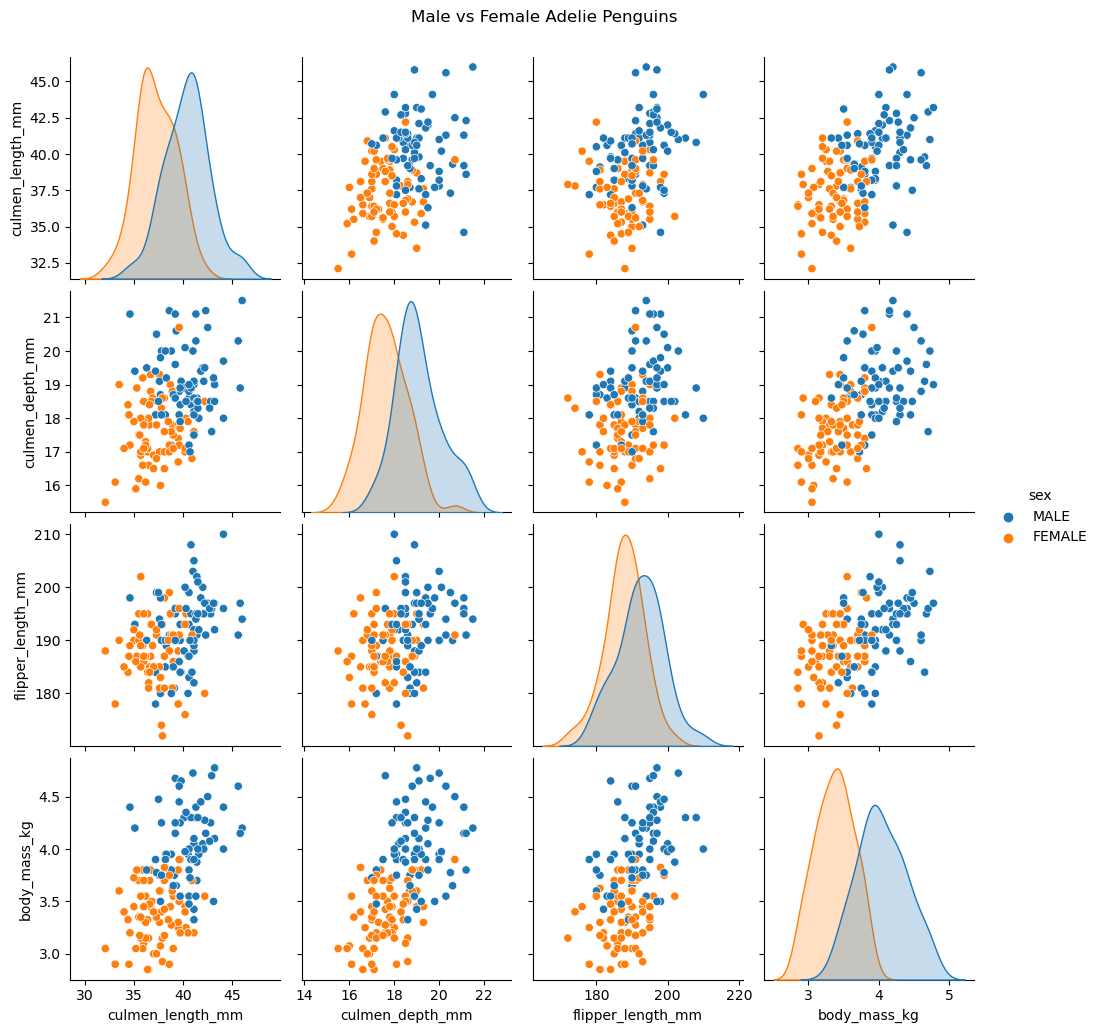

In [14]:
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(df.query('species == "Adelie"')[['sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_kg']], hue="sex")
plt.suptitle('Male vs Female Adelie Penguins', x=0.5, y=1.03);

### Identification of sex of Gentoo penguins

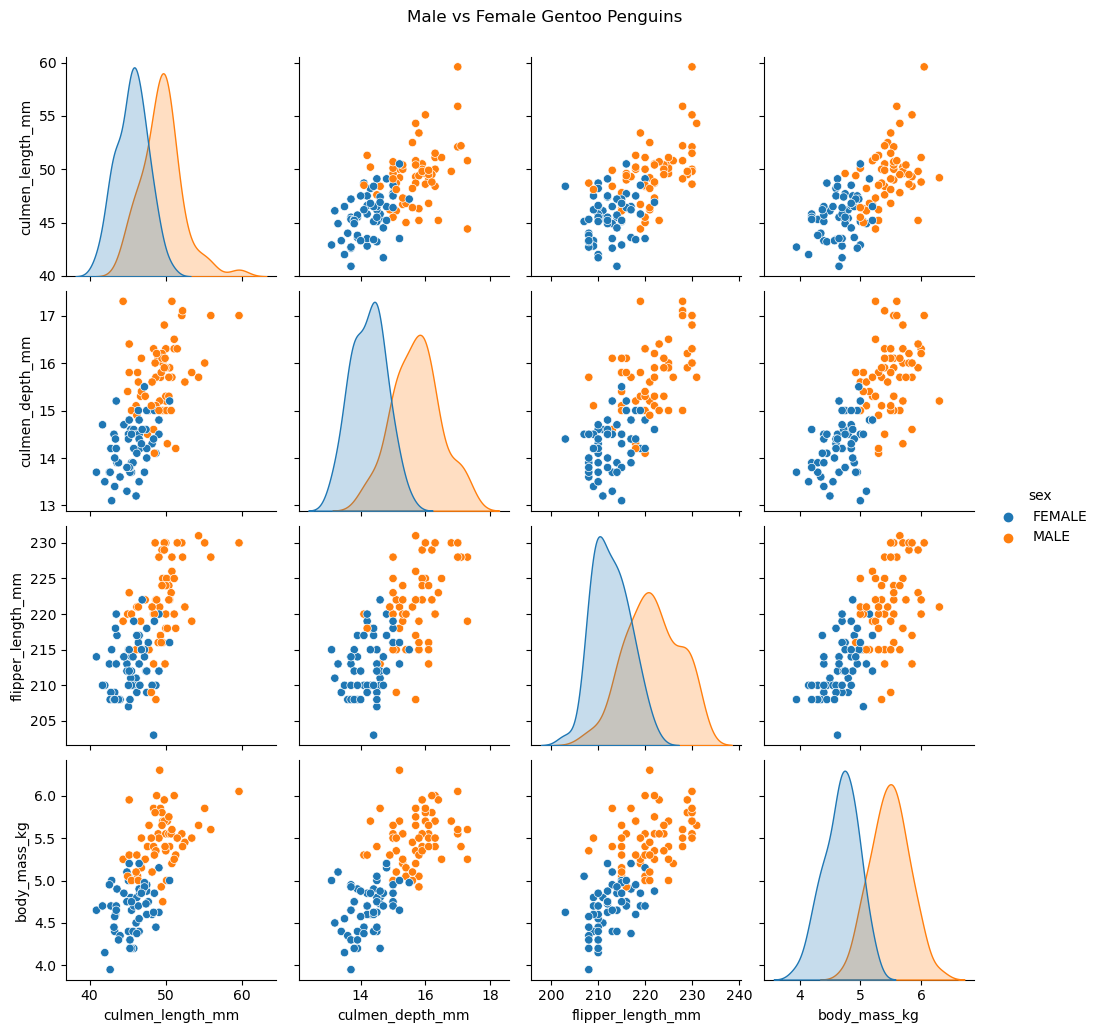

In [15]:
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(df.query('species == "Gentoo"')[['sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_kg']], hue="sex")
plt.suptitle('Male vs Female Gentoo Penguins', x=0.5, y=1.03);

### Identification of sex of Chinstrap penguins

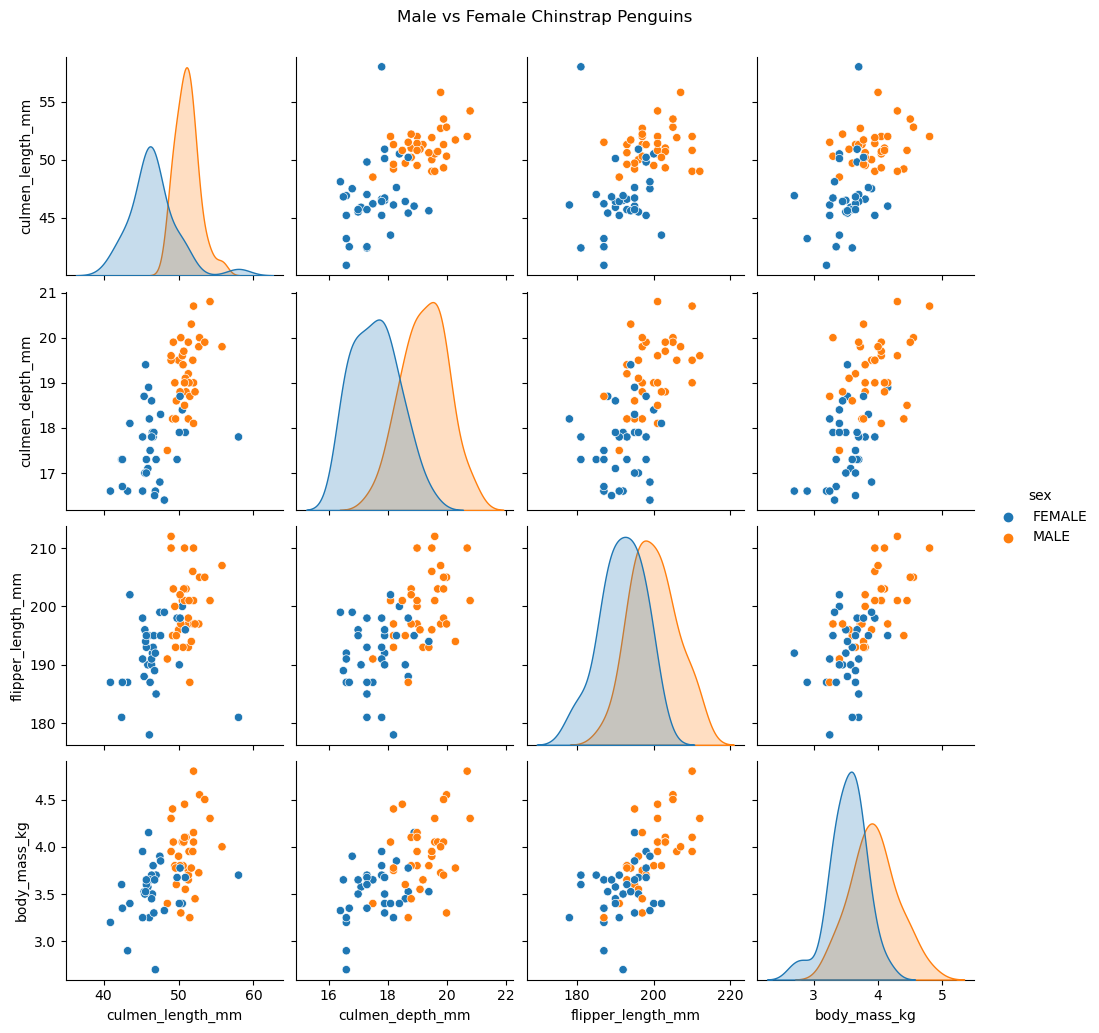

In [16]:
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.pairplot(df.query('species == "Chinstrap"')[['sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_kg']], hue="sex")
plt.suptitle('Male vs Female Chinstrap Penguins', x=0.5, y=1.03);

Distinguishing between sexes is easier to do as shown in the bar graphs and the last two pair plots.

# Introducing the Culmen Ratio

We found that the culmen depth and the culmen length, by themselves, are not enough to distinguish between the Adelie and Chinstrap species. So we came up with the Culmen Ratio.

In [17]:
df['culmen_ratio'] = df['culmen_length_mm'] / df['culmen_depth_mm']

# Culmen ratio distribution for the three species

To distinguish the penguin species better, we derived a new variable called the Culmen Ratio. It takes the culmen length and divides it by the culmen depth.

$$\text{Culmen  Ratio} = \frac{\text{Culmen Length}}{\text{Culmen Depth}}$$

Text(0.5, 1.0, 'Culmen Ratio Distribution')

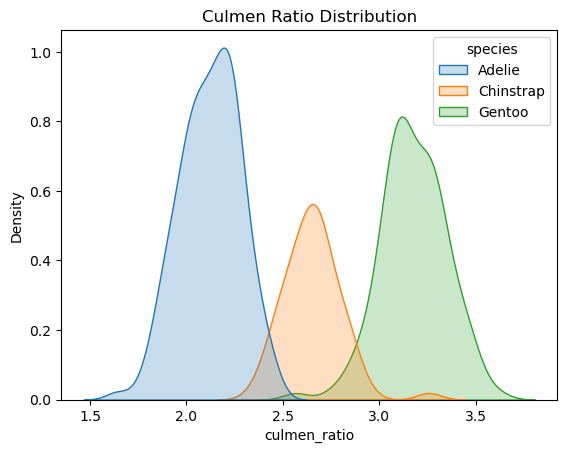

In [18]:
sns.kdeplot(data=df, x='culmen_ratio', shade=True, hue='species')
plt.title('Culmen Ratio Distribution')

The graph above shows how different the species are from each other. It shows that Gentoo penguins have the highest culmen ratio, followed by Chinstrap penguins, and then Adelie penguins.

# Culmen ratio vs body mass and flipper length

We further compared the species using the culmen ratio, their body mass, and flipper length. The results appeared to be more conclusive.

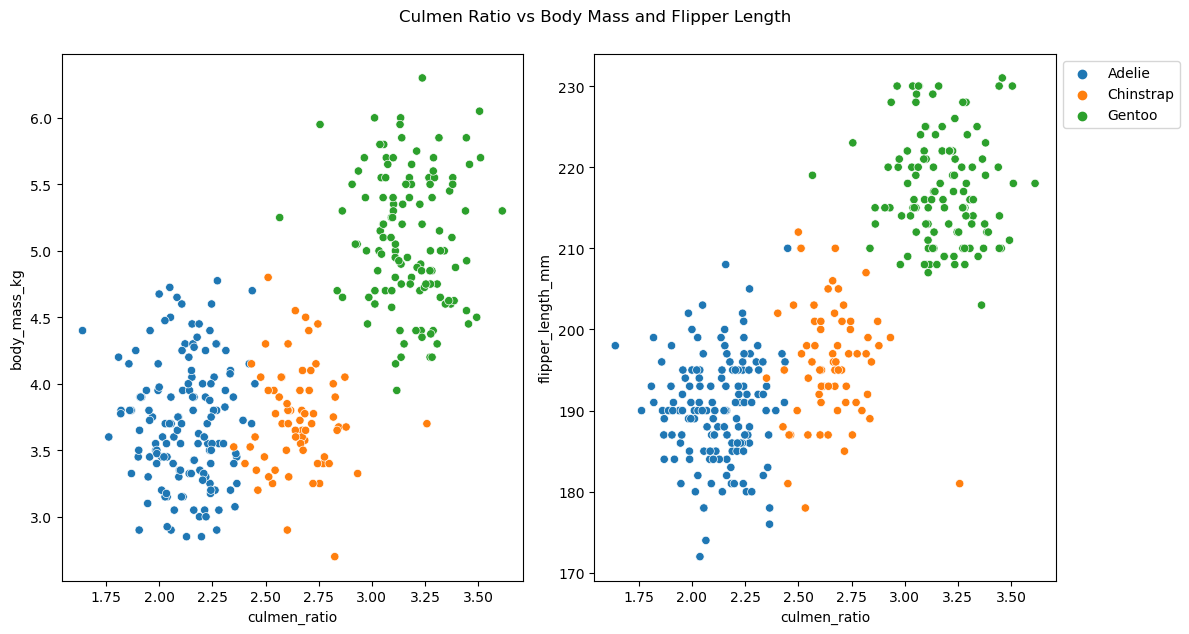

<Figure size 640x480 with 0 Axes>

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# culmen ratio vs body mass
sns.scatterplot(data=df, x=df['culmen_ratio'], y=df['body_mass_kg'], ax=axes[0], hue='species', legend=False)

# culmen ratio vs flipper length
sns.scatterplot(data=df, x=df['culmen_ratio'], y=df['flipper_length_mm'], ax=axes[1], hue='species')
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Add title
plt.suptitle('Culmen Ratio vs Body Mass and Flipper Length', x=0.5, y=1.05)

# Display the plot
plt.show();

# Conclusion

We found that the dataset could help us differentiate between male and female penguins based on their sizes, but it's harder to differentiate the species themselves. We resolved this by using the culmen ratio.

Differentiating the species using this dataset can help researchers understand the behaviors and diets of the penguins. Our external research showed that size matters for penguin survival because penguins that have larger and heavier bodies can dive deeper in the water to forage in places the smaller penguins can't. We also found that there has been a sharp decline in the population of the two smaller species in the dataset, the Adelie and Chinstrap penguins.

A deeper analysis of the dataset could help researchers enhance the diets of these penguin species, and possibly help them improve their chances of survival.